# Suicide Detection - Exploratory Data Analysis

### Table of Contents
* [Step 1. Imports](#Step-1:--Imports) 
* [Step 2. Load the Data](#Step-2:--Load-the-Data)
* [Step 3. Explore the Categories](#Step-3:--Explore-the-Categories)
* [Step 4. Length of the Post](#Step-4:--Length-of-Posts)
* [Step 5. Sentiment Analysis](#Step-5:--Sentiment-Analysis)
* [Step 6. Reading Level](#Step-6:-Look-at-Reading-Level)
* [Step 7. Look at Repetition](#Step-7:--Look-at-Repetition)
* [Step 8. Vocabulary - Most Frequent Words](#Step-8:--Vocabulary---Most-Frequent-Words)
* [Step 9. Most Predictive Words](#Step-9:--Most-Predictive-Words)
* [Step 10. Save Cleaned File](#Step-10:--Save-Cleaned-File)

# Step 1:  Imports

In [1]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from six.moves import range
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

import textstat
import re
import string
# !pip install watermark
#%load_ext watermark
from spacy.lang.en.stop_words import STOP_WORDS

import warnings
warnings.filterwarnings("ignore")


# Step 2:  Load the Data

In [2]:
df = pd.read_csv('Suicide_Detection_DataWrangling.csv')

In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,text,class,word,clean_text
0,0,2,ex wife threatening suiciderecently i left my ...,suicide,"['ex', 'wife', 'threatening', 'suiciderecently...",ex wife threatening suiciderecently left wife ...
1,1,3,am i weird i do not get affected by compliment...,non-suicide,"['weird', 'affected', 'compliment', 'coming', ...",weird affected compliment coming know irl feel...
2,2,4,finally is almost over so i can never hear h...,non-suicide,"['finally', 'hear', 'bad', 'year', 'swear', 'f...",finally hear bad year swear fucking god annoying
3,3,8,i need helpjust help me im crying so hard,suicide,"['need', 'helpjust', 'help', 'im', 'cry', 'hard']",need helpjust help im cry hard
4,4,9,i am so losthello my name is adam and i have ...,suicide,"['losthello', 'adam', 'struggling', 'year', 'a...",losthello adam struggling year afraid past yea...


# Step 3:  Explore the Categories

In [4]:
df['class'].value_counts()

suicide        116037
non-suicide    116037
Name: class, dtype: int64

In [5]:
n_postings = len(df)
print("Number of posts: {:d}".format(n_postings))

Number of posts: 232074


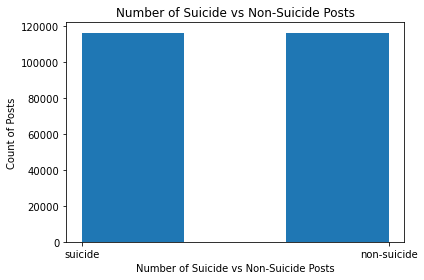

In [6]:
plt.hist(df['class'], bins=3);
plt.xlabel('Number of Suicide vs Non-Suicide Posts')
plt.ylabel('Count of Posts')
plt.title('Number of Suicide vs Non-Suicide Posts')

plt.tight_layout()
plt.savefig('Balanced_Data_Set.png')

We have a total of 232,074 posts with an equal number from each category. This is an extremely balanced data set.

# Step 4:  Length of Posts

In [7]:
df.dropna(inplace = True)

In [8]:
df['clean_text'].apply(len).min()

1

In [9]:
df['clean_text'].apply(len).max()

599479

In [10]:
post_length = df['clean_text'].apply(len).mean()
print("Average Post Length: " + str(post_length))

suicide_length = df['clean_text'][df['class'] == 'suicide'].apply(len).mean()
print("Average length of post in suicide forum: " + str(suicide_length))

non_suicide_length = df['clean_text'][df['class'] != 'suicide'].apply(len).mean()
print("Average length of post in teenage forum: " + str(non_suicide_length))

Average Post Length: 344.57153446039416
Average length of post in suicide forum: 497.30735751652577
Average length of post in teenage forum: 191.8185971142409


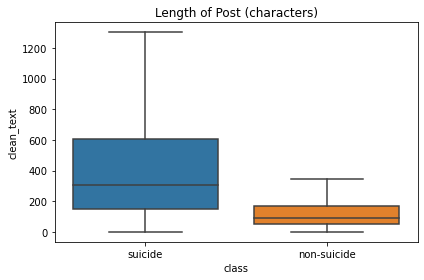

In [11]:
len_text = df['clean_text'].apply(len)
sns.boxplot(x=df['class'],y=len_text, showfliers = False).set_title("Length of Post (characters)")
plt.tight_layout()
plt.savefig('Length_of_post.png')

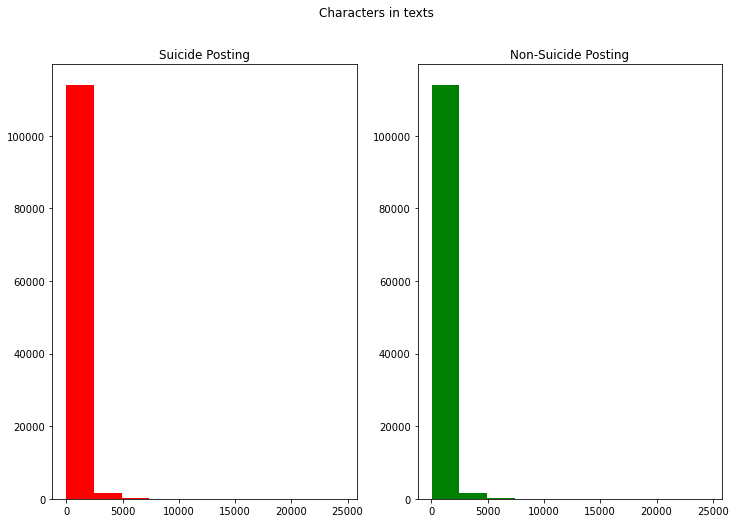

In [12]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['class']=='suicide']['clean_text'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Suicide Posting')
text_len=df[df['class']=='suicide']['clean_text'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Non-Suicide Posting')
fig.suptitle('Characters in texts')
plt.show()

In [13]:
import scipy.stats as stats
stats.ttest_ind(df['clean_text'][df['class'] == 'suicide'].apply(len), df['clean_text'][df['class'] != 'suicide'].apply(len))

Ttest_indResult(statistic=45.609814478252, pvalue=0.0)

The average length of the posts in the suicide forum are much longer than the average length of posts in the teenager forum.  A t-test confirms the differences are statistically different.  Therefore we will go ahead and add a column to our dataframe to indicate the length of the post.  

In [14]:
df['length'] = ''

In [15]:
for i in range(len(df)):
    length = len(df['clean_text'].iloc[i])
    df['length'].iloc[i] = length

In [16]:
df.head()

,Unnamed: 0.1,Unnamed: 0,text,class,word,clean_text,length
0,0,2,ex wife threatening suiciderecently i left my ...,suicide,"['ex', 'wife', 'threatening', 'suiciderecently...",ex wife threatening suiciderecently left wife ...,345
1,1,3,am i weird i do not get affected by compliment...,non-suicide,"['weird', 'affected', 'compliment', 'coming', ...",weird affected compliment coming know irl feel...,69
2,2,4,finally is almost over so i can never hear h...,non-suicide,"['finally', 'hear', 'bad', 'year', 'swear', 'f...",finally hear bad year swear fucking god annoying,48
3,3,8,i need helpjust help me im crying so hard,suicide,"['need', 'helpjust', 'help', 'im', 'cry', 'hard']",need helpjust help im cry hard,30
4,4,9,i am so losthello my name is adam and i have ...,suicide,"['losthello', 'adam', 'struggling', 'year', 'a...",losthello adam struggling year afraid past yea...,1281


# Step 5:  Sentiment Analysis

In [17]:
from textblob import TextBlob

text = 'I really like it here at camp. All the councelors are great and I am making some friends.  All the boys are hot and the facilities are great.  I love it here.  However, the food is terrible'

blob_text = TextBlob(text)
polarity = blob_text.polarity
print(polarity)

0.2583333333333333


In [18]:
### insert column to collect sentiment analysis
df['sentiment'] = ''

In [19]:
for i in range(len(df)):
    df['sentiment'].iloc[i] = TextBlob(df['clean_text'].iloc[i]).polarity

In [20]:
df['sentiment'].isna().sum()

0

In [21]:
df.head()

,Unnamed: 0.1,Unnamed: 0,text,class,word,clean_text,length,sentiment
0,0,2,ex wife threatening suiciderecently i left my ...,suicide,"['ex', 'wife', 'threatening', 'suiciderecently...",ex wife threatening suiciderecently left wife ...,345,0.1
1,1,3,am i weird i do not get affected by compliment...,non-suicide,"['weird', 'affected', 'compliment', 'coming', ...",weird affected compliment coming know irl feel...,69,0.1
2,2,4,finally is almost over so i can never hear h...,non-suicide,"['finally', 'hear', 'bad', 'year', 'swear', 'f...",finally hear bad year swear fucking god annoying,48,-0.525
3,3,8,i need helpjust help me im crying so hard,suicide,"['need', 'helpjust', 'help', 'im', 'cry', 'hard']",need helpjust help im cry hard,30,-0.291667
4,4,9,i am so losthello my name is adam and i have ...,suicide,"['losthello', 'adam', 'struggling', 'year', 'a...",losthello adam struggling year afraid past yea...,1281,-0.228461


In [22]:
suicide_sentiment = df['sentiment'][df['class'] == 'suicide'].mean()
non_suicide_sentiment = df['sentiment'][df['class'] != 'suicide'].mean()

In [23]:
print('average sentiment of post in suicide forum: ' + str(suicide_sentiment))
print('average sentiment of post in teenage forum: ' + str(non_suicide_sentiment))

average sentiment of post in suicide forum: -0.02242214041675589
average sentiment of post in teenage forum: 0.029875136374806602


In [24]:
df_suicide = df[df['class'] == 'suicide']
df_non_suicide = df[df['class'] != 'suicide']

import scipy.stats as stats
stats.ttest_ind(df_non_suicide['sentiment'], df_suicide['sentiment'])

Ttest_indResult(statistic=47.78789209111847, pvalue=0.0)

Apparently the difference between these two groups is also statistically significant.

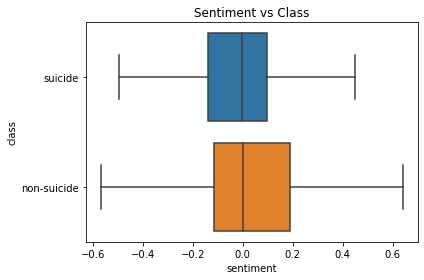

In [25]:
sns.boxplot(x = 'sentiment', y = 'class', data = df, showfliers = False)
plt.title('Sentiment vs Class')


plt.tight_layout()
plt.savefig('Sentiment_v_class.png')

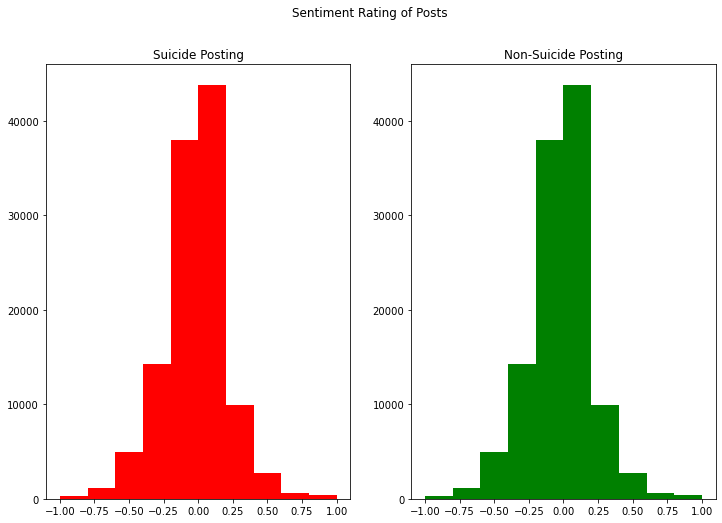

In [26]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_sent=df[df['class']=='suicide']['sentiment']
ax1.hist(text_sent,color='red')
ax1.set_title('Suicide Posting')
text_sent=df[df['class']=='suicide']['sentiment']
ax2.hist(text_sent,color='green')
ax2.set_title('Non-Suicide Posting')
fig.suptitle('Sentiment Rating of Posts')
plt.show()

# Step 6: Look at Reading Level

In [27]:
df_non_suicide = df[df['class'] != 'suicide']

In [28]:
df_suicide = df[df['class'] == 'suicide']

In [29]:
lista = []
for iter in range(len(df_non_suicide)):
    lista.append(textstat.flesch_kincaid_grade(df_non_suicide['clean_text'].iloc[iter]))

print(np.mean(lista))

17.683336206450722


In [30]:
listb = []
for iter in range(len(df_non_suicide)):
    listb.append(textstat.flesch_kincaid_grade(df_suicide['clean_text'].iloc[iter]))

print(np.mean(listb))

32.55534572221552


In [31]:
stats.ttest_ind(lista, listb)

Ttest_indResult(statistic=-9.299062745580246, pvalue=1.4286144212370826e-20)

Interesting.  The mean Flesch Kincaid Grade for postings in the 'suicide' forum are higher than the Grade for postings in the 'teenage' forum.  The difference is statistically significant according to the t-test.  We will go ahead and include a column for Flesch_Kincaid 

In [32]:
df['flesch_kincaid'] = ''

In [33]:
for i in range(len(df)):
    df['flesch_kincaid'].iloc[i] = textstat.flesch_kincaid_grade(df['clean_text'].iloc[i])

In [34]:
df.head()

,Unnamed: 0.1,Unnamed: 0,text,class,word,clean_text,length,sentiment,flesch_kincaid
0,0,2,ex wife threatening suiciderecently i left my ...,suicide,"['ex', 'wife', 'threatening', 'suiciderecently...",ex wife threatening suiciderecently left wife ...,345,0.1,24.4
1,1,3,am i weird i do not get affected by compliment...,non-suicide,"['weird', 'affected', 'compliment', 'coming', ...",weird affected compliment coming know irl feel...,69,0.1,8.4
2,2,4,finally is almost over so i can never hear h...,non-suicide,"['finally', 'hear', 'bad', 'year', 'swear', 'f...",finally hear bad year swear fucking god annoying,48,-0.525,6.4
3,3,8,i need helpjust help me im crying so hard,suicide,"['need', 'helpjust', 'help', 'im', 'cry', 'hard']",need helpjust help im cry hard,30,-0.291667,-1.5
4,4,9,i am so losthello my name is adam and i have ...,suicide,"['losthello', 'adam', 'struggling', 'year', 'a...",losthello adam struggling year afraid past yea...,1281,-0.228461,73.9


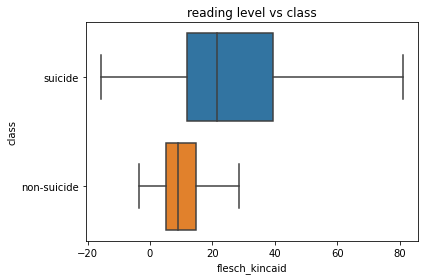

In [35]:
sns.boxplot(x = 'flesch_kincaid', y = 'class', data = df, showfliers=False)
plt.title('reading level vs class')

plt.tight_layout()
plt.savefig('Reading_Level_v_class.png')

# Step 7:  Look at Repetition

Sometimes writers will use repeated words for emphasis.  A mad mad mad mad world has more emphasis than a mad world.

In [36]:
df['repetition'] = ''

In [37]:
for item in range(len(df)):

    words = df['clean_text'].iloc[item].split(" ")  
   
    
    count = 0; 
    for i in range(len(words)-1):  
        if words[i] == words[i+1]:
            count = count + 1

    df['repetition'].iloc[item] = count

In [38]:
df.head(4)

,Unnamed: 0.1,Unnamed: 0,text,class,word,clean_text,length,sentiment,flesch_kincaid,repetition
0,0,2,ex wife threatening suiciderecently i left my ...,suicide,"['ex', 'wife', 'threatening', 'suiciderecently...",ex wife threatening suiciderecently left wife ...,345,0.1,24.4,0
1,1,3,am i weird i do not get affected by compliment...,non-suicide,"['weird', 'affected', 'compliment', 'coming', ...",weird affected compliment coming know irl feel...,69,0.1,8.4,0
2,2,4,finally is almost over so i can never hear h...,non-suicide,"['finally', 'hear', 'bad', 'year', 'swear', 'f...",finally hear bad year swear fucking god annoying,48,-0.525,6.4,0
3,3,8,i need helpjust help me im crying so hard,suicide,"['need', 'helpjust', 'help', 'im', 'cry', 'hard']",need helpjust help im cry hard,30,-0.291667,-1.5,0


In [39]:
print(df['repetition'][df['class'] == 'suicide'].std())
print(df['repetition'][df['class'] != 'suicide'].std())

7.394177358304586
49.813657345677036


In [40]:
print(len(df[df['repetition'] == 0]) / len(df))

0.7973574546755211


In [41]:
df_rep = df[df['repetition'] != 0]

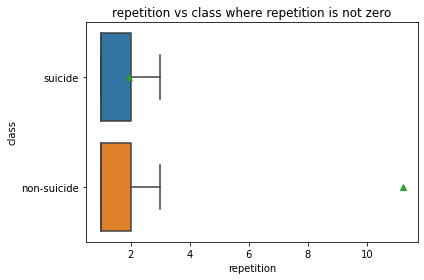

In [42]:
sns.boxplot(x = 'repetition', y = 'class', data = df_rep, showmeans = True, showfliers = False)
plt.title('repetition vs class where repetition is not zero')

plt.tight_layout()
plt.savefig('Repetition_v_class.png')

In [43]:
df_suicide = df[df['class'] == 'suicide']
df_non_suicide = df[df['class'] != 'suicide']


stats.ttest_ind(df_non_suicide['repetition'], df_suicide['repetition'])

Ttest_indResult(statistic=6.062487617796879, pvalue=1.3423782603240194e-09)

# Step 8:  Vocabulary - Most Frequent Words

In [44]:
suicide_words = df_suicide['clean_text']
non_suicide_words = df_non_suicide['clean_text']

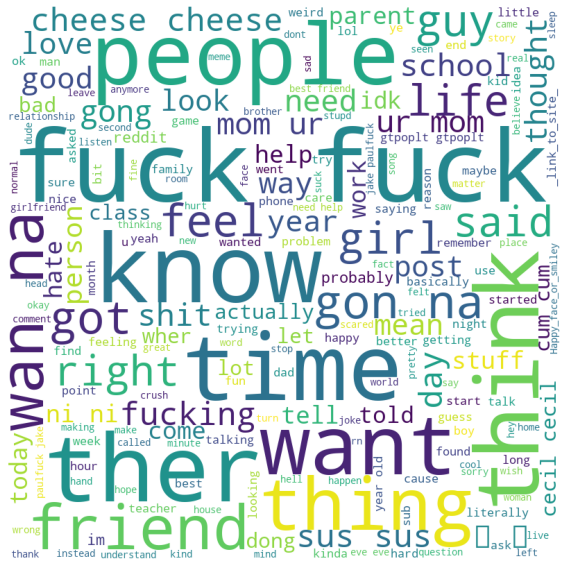

In [45]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)

for val in df['clean_text'][df['class'] != 'suicide']:
    val = str(val)
    tokens = val.split()  
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.tight_layout()
plt.savefig('Non_Suicide_Word_Cloud_Frequency.png')

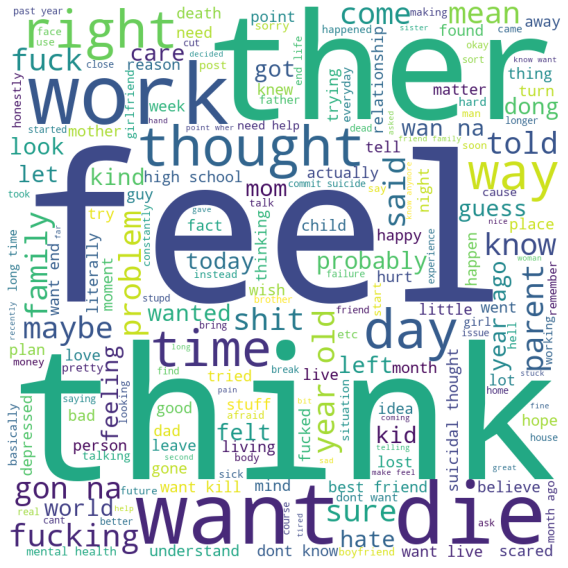

In [46]:
comment_words = ''
stopwords = set(STOPWORDS)

for val in df['clean_text'][df['class'] == 'suicide']:
    val = str(val)
    tokens = val.split()   
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.tight_layout()
plt.savefig('Suicide_Word_Cloud_Frequency.png')

# Step 9:  Most Predictive Words

### First using Naive Bayes

In [47]:
df['clean_text'].fillna("abcdefg", inplace = True)

In [48]:
df.head()

,Unnamed: 0.1,Unnamed: 0,text,class,word,clean_text,length,sentiment,flesch_kincaid,repetition
0,0,2,ex wife threatening suiciderecently i left my ...,suicide,"['ex', 'wife', 'threatening', 'suiciderecently...",ex wife threatening suiciderecently left wife ...,345,0.1,24.4,0
1,1,3,am i weird i do not get affected by compliment...,non-suicide,"['weird', 'affected', 'compliment', 'coming', ...",weird affected compliment coming know irl feel...,69,0.1,8.4,0
2,2,4,finally is almost over so i can never hear h...,non-suicide,"['finally', 'hear', 'bad', 'year', 'swear', 'f...",finally hear bad year swear fucking god annoying,48,-0.525,6.4,0
3,3,8,i need helpjust help me im crying so hard,suicide,"['need', 'helpjust', 'help', 'im', 'cry', 'hard']",need helpjust help im cry hard,30,-0.291667,-1.5,0
4,4,9,i am so losthello my name is adam and i have ...,suicide,"['losthello', 'adam', 'struggling', 'year', 'a...",losthello adam struggling year afraid past yea...,1281,-0.228461,73.9,2


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232049 entries, 0 to 232073
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0.1    232049 non-null  int64 
 1   Unnamed: 0      232049 non-null  int64 
 2   text            232049 non-null  object
 3   class           232049 non-null  object
 4   word            232049 non-null  object
 5   clean_text      232049 non-null  object
 6   length          232049 non-null  object
 7   sentiment       232049 non-null  object
 8   flesch_kincaid  232049 non-null  object
 9   repetition      232049 non-null  object
dtypes: int64(2), object(8)
memory usage: 19.5+ MB


In [50]:
df_samp = df.head(200000)

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Create term-document matrix2with CountVectorizer
vectorizer = CountVectorizer(min_df=60)
X = vectorizer.fit_transform(df['clean_text'])
X = X.tocsc() 
y = df['class']


# Train a predictive model on the matrix
clf = MultinomialNB()
clf.fit(X, y)

MultinomialNB()

In [52]:
#  Create an identity matrix the length of the vocabulary
from scipy.sparse import identity

x = np.eye(X.shape[1])


In [53]:
# Use your model to predict on the identity matrix and get a list of probabilities for each word.
words = np.array(vectorizer.get_feature_names())

probs = clf.predict_log_proba(x)[:, 0]
ind = np.argsort(probs)


good_words = words[ind[:25]]
bad_words = words[ind[-25:]]

good_prob = probs[ind[:25]]
bad_prob = probs[ind[-25:]]

print("Suicide words\t     P(suicide | word)")
for w, p in zip(good_words, good_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
    
print("Teenage words\t     P(suicide | word)")
for w, p in zip(bad_words, bad_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
    
    


Suicide words	     P(suicide | word)
              fiance 0.99
              benzos 0.99
              faggot 0.98
           platitude 0.98
          wellbutrin 0.98
            retarded 0.98
                 dbt 0.98
            ideation 0.97
              ativan 0.97
            slitting 0.97
           medicated 0.97
             aspirin 0.97
             effexor 0.97
             lexapro 0.97
               lease 0.97
          outpatient 0.97
      hospitalzation 0.97
              retard 0.97
           inpatient 0.97
              ambien 0.97
          medicating 0.97
       acetaminophen 0.97
         depressants 0.96
                 oxy 0.96
             fiancee 0.96
Teenage words	     P(suicide | word)
smiling_face_with_sunglasses 0.00
                ight 0.00
            valorant 0.00
                 cum 0.00
               shrek 0.00
              rmemes 0.00
                snoo 0.00
                 owo 0.00
          megathiccc 0.00
              kahoot 0.00
        

In [54]:
suicide_d = {good_words[i]: good_prob[i] for i in range(len(good_words))}

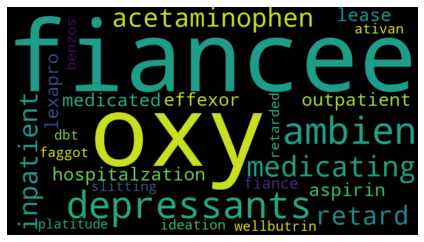

In [55]:
wordcloud = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(suicide_d)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.savefig('Non_Suicide_Word_Cloud_Predictive.png')

In [56]:
non_suicide_d = {bad_words[i]: bad_prob[i] for i in range(len(bad_words))}

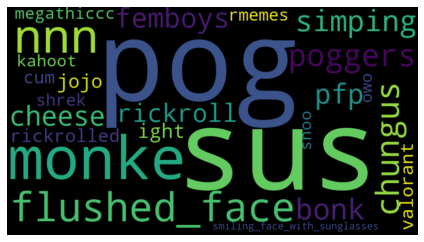

In [57]:
wordcloud = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(non_suicide_d)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.savefig('uicide_Word_Cloud_Predictive.png')

## Next get predictive words using F-Score (precision and recall)

In [58]:
# This procedure is based on the methods found in this article https://towardsdatascience.com/analyzing-yelp-dataset-with-scattertext-spacy-82ea8bb7a60e

import spacy
import scattertext

In [59]:
def term_freq(df):
    corpus = (scattertext.CorpusFromPandas(df,
                                           category_col='class', 
                                           text_col='clean_text')
              .build()
              .remove_terms(STOP_WORDS, ignore_absences=True)
              )
    
    df = corpus.get_term_freq_df()
    
    df['Suicide_Score'] = corpus.get_scaled_f_scores('suicide')
    df['Non_Suicide_Score'] = corpus.get_scaled_f_scores('non-suicide')
    df['Suicide_Score'] = round(df['Suicide_Score'], 2)
    df['Non_Suicide_Score'] = round(df['Non_Suicide_Score'], 2)
    
    df_high = df.sort_values(by='Suicide_Score', 
                             ascending = False).reset_index()
    df_low = df.sort_values(by='Non_Suicide_Score', 
                            ascending=False).reset_index()
    return df_high, df_low

In [60]:
suicide_high, suicide_low = term_freq(df)

In [61]:
suicide_high.head(5)

,term,suicide freq,non-suicide freq,Suicide_Score,Non_Suicide_Score
0,painless,1348,19,1.0,0.0
1,tried kill,2009,46,1.0,0.0
2,die know,895,22,1.0,0.0
3,think suicide,1292,21,1.0,0.0
4,psychiatrist,2600,56,1.0,0.0


In [62]:
suicide_low.head(55)

,term,suicide freq,non-suicide freq,Suicide_Score,Non_Suicide_Score
0,⣶,0,1440,0.0,1.0
1,gtbyelt gtbyelt,0,417,0.0,1.0
2,gt\-pop,0,388,0.0,1.0
3,⡵,0,250,0.0,1.0
4,⣀,0,478,0.0,1.0
5,⣸,0,337,0.0,1.0
6,⣼,0,722,0.0,1.0
7,⣾,0,1200,0.0,1.0
8,⣴,0,542,0.0,1.0
9,⡄ ⢸,0,172,0.0,1.0


In [63]:
xxx = (suicide_high['term'][:35]).tolist() 
yyy = (suicide_high['Suicide_Score'][:35]).tolist() 
suicide_ddd = {xxx[i]: yyy[i] for i in range(len(xxx))}

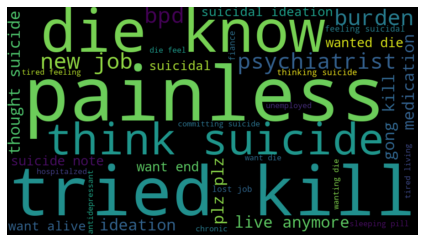

In [64]:
wordcloud = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(suicide_ddd)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.tight_layout()
plt.savefig('Suicide_Word_Cloud_FSCORE.png')

In [65]:
aaa = (suicide_low['term'][:35]).tolist() 
bbb = (suicide_low['Non_Suicide_Score'][:35]).tolist() 
non_suicide_ddd = {aaa[i]: bbb[i] for i in range(len(aaa))}

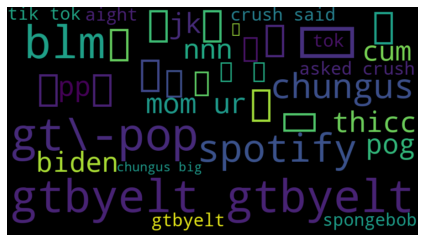

In [66]:
wordcloud = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(non_suicide_ddd)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.tight_layout()
plt.savefig('Non_Suicide_Word_Cloud_FSCORE.png')

# Step 10:  Save Cleaned File

In [67]:
df.to_csv('Suicide_Detection_Cleaned.csv')